In [1]:
import tweepy, json, pymongo
import pandas as pd
from utils import *
from analysis import *
from TextAnalysis import *

In [2]:
tweets = loadTweets(collectionName='ballonDOrOriginal',fromDb=True)

In [3]:
#all the keys found in the tweets collection
allKeys = set()
for tweet in tweets:
    allKeys.update(tweet.keys())
    
allKeys

{'contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'extended_tweet',
 'favorite_count',
 'favorited',
 'filter_level',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'quote_count',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'reply_count',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'text',
 'timestamp_ms',
 'truncated',
 'user'}

In [4]:
#REMOVES ALL THE USELESS FEATURES OF THE TWEETS(SUCH AS ID, ETC.)

attrToRemove = ['id','id_str','in_reply_to_screen_name','in_reply_to_status_id_str','in_reply_to_user_id',
            'in_reply_to_user_id_str','quoted_status_id_str','favorited','retweeted','possibly_sensitive',
            'filter_level','timestamp_ms','truncated','quoted_status_id', 'created_at', 'extended_entities',
               'in_reply_to_status_id']

ballondorTweetsUpdated = []

for tweet in tweets:
    #removes tweets which contain truncated text from the collected one
    if not tweet['truncated']:
        #REMOVES ALL THE USELESS FEATURES OF A TWEET(SUCH AS ID, ETC.)
        ballondorTweetsUpdated.append({a : tweet[a] for a in tweet if a not in attrToRemove})

In [5]:
tweetsDf = pd.DataFrame(ballondorTweetsUpdated)
import matplotlib.pyplot as plt

In [9]:
langs = tweetsDf['lang'].value_counts()
langs

en     2776
es     1576
fr      590
ar      538
it      349
und     187
pt      172
in      131
ja       52
th       20
hi       13
tr        5
pl        5
ht        3
fi        3
de        2
uk        1
nl        1
cy        1
ta        1
tl        1
fa        1
sl        1
no        1
ru        1
Name: lang, dtype: int64

In [10]:
getPercentValues(df=tweetsDf,attributeName='lang')

lang
en     43.165915
es     24.506298
fr      9.174312
ar      8.365729
it      5.426839
und     2.907790
pt      2.674545
in      2.037008
ja      0.808583
th      0.310994
hi      0.202146
pl      0.077748
tr      0.077748
fi      0.046649
ht      0.046649
de      0.031099
ru      0.015550
ta      0.015550
uk      0.015550
nl      0.015550
fa      0.015550
tl      0.015550
no      0.015550
cy      0.015550
sl      0.015550
dtype: float64

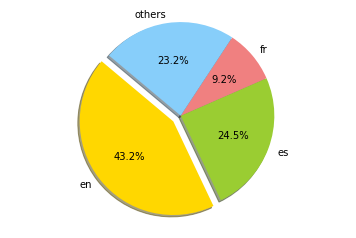

In [11]:
langs = tweetsDf['lang'].value_counts()
frstLangs = langs[:3]
othersLangs = langs[3:]
tags = list(frstLangs.index)
tags.append("others")
tags

values = list(i for i in frstLangs)
values.append(sum(list(i for i in othersLangs)))
#values.append(sum(list(othersLangs.get(i) for i in othersLangs)))
values

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(values, explode=explode, labels=tags, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()


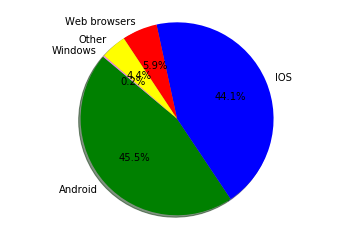

In [12]:
sourcesList = []
for source in tweetsDf['source']:
    try:
        sourcesList.append(mapSources(remove_tags(source)))
    except:
        sourcesList.append(mapSources(source))
sources = pd.Series(sourcesList).value_counts()
sourcesTags = list(sources.index)

sourcesValues = list(sources)
#values.append(sum(list(othersLangs.get(i) for i in othersLangs)))

colors = ['green', 'blue', 'red', 'yellow','violet']
explode = (0.0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sourcesValues, explode=explode, labels=sourcesTags, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()


In [13]:
getNofNull(tweetsDf,'retweeted_status')
getPercentValues(tweetsDf,'source')

source
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>                     45.342870
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                       42.326232
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                                        5.551236
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Lite</a>                                      2.534598
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>                         1.632717
<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M2)</a>                                   0.342093
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>                       0.342093
<a href="http://www.oscrape.com" rel="nofollow">Oscrape AutoBot</a>                                       0.326543
<a href="http://www.twitter.com" rel="nofollow">Twitter for Windows</a>  

In [14]:
getNofNull(tweetsDf,'coordinates')
getPercentNull(tweetsDf,'coordinates')

0.99922251593842326

In [19]:
#TEXT ANALYSIS

texts = [tweet['text'] for tweet in ballondorTweetsUpdated]
cleanedTexts = list(map(lambda x: text_clean(x),texts))
if tweetsDf is None:
    tweetsDf = pd.DataFrame()
tweetsDf['clean_text'] = cleanedTexts
features = list(map(lambda x: text_preprocess(x), cleanedTexts))

In [20]:
features

[{'emoticons': ['⚽', '⚽', '⚽', '⚽', '⚽', '⚽', '⚽', '⚽', '⚽', '⚽'],
  'words': [('rt', 'n', 'rt', 'rt'),
   ('laligaen', 'n', 'laligaen', 'laligaen'),
   ('two', 'n', 'two', 'two'),
   ('legends', 'n', 'legend', 'legend'),
   ('10', 'a', '10', '10'),
   ('ballondor', 'a', 'ballondor', 'ballondor'),
   ('cristiano', 'n', 'cristiano', 'cristiano'),
   ('⚽️⚽️⚽️⚽️⚽️', 'a', '⚽️⚽️⚽️⚽️⚽️', '⚽️⚽️⚽️⚽️⚽️'),
   ('messi', 'n', 'messi', 'messi'),
   ('⚽️⚽️⚽️⚽️⚽️', 'a', '⚽️⚽️⚽️⚽️⚽️', '⚽️⚽️⚽️⚽️⚽️'),
   ('laliga', 'n', 'laliga', 'laliga')]},
 {'emoticons': ['🏆', '🎉', '🎇', '👏'],
  'words': [('rt', 'n', 'rt', 'rt'),
   ('championsleague', 'n', 'championsleagu', 'championsleague'),
   ('winner', 'n', 'winner', 'winner'),
   ('ballondor', 'n', 'ballondor', 'ballondor'),
   ('ronaldo', 'n', 'ronaldo', 'ronaldo'),
   ('congratulations', 'n', 'congratul', 'congratulation'),
   ('cristiano', 'n', 'cristiano', 'cristiano')]},
 {'emoticons': [],
  'words': [('rt', 'n', 'rt', 'rt'),
   ('marca', 'n', 'marca', 'ma

In [21]:
bow = getBow(features, asBoolean=True)
bow['origWords']

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [22]:
getTopNWords(bow,n=15)

[('rt', 5997),
 ('ballondor', 4228),
 ('cristiano', 3081),
 ('🏆', 1868),
 ('ronaldo', 1594),
 ('messi', 1480),
 ('de', 1082),
 ('…', 974),
 ('2017', 944),
 ('congratulations', 871),
 ('championsleague', 736),
 ('oro', 646),
 ('2008', 612),
 ('ballon', 601),
 ('👏', 560)]

In [23]:
counts = {}
for tweet in tweetsDf['entities']:
    hashtags = tweet['hashtags']
    for hashtag in hashtags:
        text = hashtag['text'].lower()
        if text in counts:
            counts[text]+=1
        else:
            counts[text]=1
    hashTagCounts = [(k, counts[k]) for k in sorted(counts, key=counts.get, reverse=True)]

hashTagCounts
#tweetsDf.iloc[0]['entities']['hashtags']

[('ballondor', 4233),
 ('ballondor2017', 268),
 ('cr7', 186),
 ('idol', 141),
 ('em21', 140),
 ('thebest', 110),
 ('teamoftheyear', 92),
 ('eiffeltower', 74),
 ('cristianoronaldo', 71),
 ('messi', 68),
 ('ronaldo', 57),
 ('laliga', 42),
 ('laportada', 24),
 ('toureiffel', 21),
 ('lomásvisto', 19),
 ('balondeoro', 18),
 ('jumatberkah', 17),
 ('elshintanews', 17),
 ('cristiano', 16),
 ('cri5tiano', 14),
 ('elchiringuitodemega', 13),
 ('lomásviral', 12),
 ('balondeoro2017', 12),
 ('cr5', 12),
 ('الكرة_الذهبية', 11),
 ('g1g1', 10),
 ('halamadrid', 10),
 ('portugal', 10),
 ('allezparis', 10),
 ('lomáscomentado', 10),
 ('mufc', 9),
 ('psg', 9),
 ('infobola', 8),
 ('semuanyabola', 8),
 ('كريستيانو_رونالدو', 7),
 ('cr7era', 7),
 ('jamasvotariaporrosales', 6),
 ('trafficrequestwithosi', 6),
 ('afp', 5),
 ('football', 5),
 ('balóndeoro', 5),
 ('بوفون', 5),
 ('bbcqt', 5),
 ('jerusalem', 5),
 ('elclasico', 5),
 ('chiringuitocristiano', 4),
 ('benzema', 4),
 ('rmfamily', 4),
 ('goat', 4),
 ('forçab

In [27]:
ballondorTweetsUpdated[0]

{'contributors': None,
 'coordinates': None,
 'entities': {'hashtags': [{'indices': [32, 42], 'text': 'BallondOr'},
   {'indices': [86, 93], 'text': 'LaLiga'}],
  'media': [{'display_url': 'pic.twitter.com/Xai9clHeZ1',
    'expanded_url': 'https://twitter.com/LaLigaEN/status/938850418402254848/photo/1',
    'id': 938849185134243845,
    'id_str': '938849185134243845',
    'indices': [94, 117],
    'media_url': 'http://pbs.twimg.com/media/DQd2XBGXcAU5Lel.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DQd2XBGXcAU5Lel.jpg',
    'sizes': {'large': {'h': 1024, 'resize': 'fit', 'w': 1024},
     'medium': {'h': 1024, 'resize': 'fit', 'w': 1024},
     'small': {'h': 680, 'resize': 'fit', 'w': 680},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'source_status_id': 938850418402254848,
    'source_status_id_str': '938850418402254848',
    'source_user_id': 4704552148,
    'source_user_id_str': '4704552148',
    'type': 'photo',
    'url': 'https://t.co/Xai9clHeZ1'}],
  'sy

In [24]:
features[0]['words']

[('rt', 'n', 'rt', 'rt'),
 ('laligaen', 'n', 'laligaen', 'laligaen'),
 ('two', 'n', 'two', 'two'),
 ('legends', 'n', 'legend', 'legend'),
 ('10', 'a', '10', '10'),
 ('ballondor', 'a', 'ballondor', 'ballondor'),
 ('cristiano', 'n', 'cristiano', 'cristiano'),
 ('⚽️⚽️⚽️⚽️⚽️', 'a', '⚽️⚽️⚽️⚽️⚽️', '⚽️⚽️⚽️⚽️⚽️'),
 ('messi', 'n', 'messi', 'messi'),
 ('⚽️⚽️⚽️⚽️⚽️', 'a', '⚽️⚽️⚽️⚽️⚽️', '⚽️⚽️⚽️⚽️⚽️'),
 ('laliga', 'n', 'laliga', 'laliga')]

In [25]:
######### BALLONDOR ANALYSIS BY RETWEET, REPLY, FAVOURITES ETC.


#retrieving bitcoin tweets previously saved on mongodb (to do that, please remember to start mongod service)
ballondorTweets = loadTweets(collectionName='ballonDOrLate',fromDb=True, dbName='tweets')



In [26]:
ballondorTweets[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri Dec 08 01:08:31 +0000 2017',
 'entities': {'hashtags': [{'indices': [32, 42], 'text': 'BallondOr'},
   {'indices': [86, 93], 'text': 'LaLiga'}],
  'media': [{'display_url': 'pic.twitter.com/Xai9clHeZ1',
    'expanded_url': 'https://twitter.com/LaLigaEN/status/938850418402254848/photo/1',
    'id': 938849185134243845,
    'id_str': '938849185134243845',
    'indices': [94, 117],
    'media_url': 'http://pbs.twimg.com/media/DQd2XBGXcAU5Lel.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DQd2XBGXcAU5Lel.jpg',
    'sizes': {'large': {'h': 1024, 'resize': 'fit', 'w': 1024},
     'medium': {'h': 1024, 'resize': 'fit', 'w': 1024},
     'small': {'h': 680, 'resize': 'fit', 'w': 680},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'source_status_id': 938850418402254848,
    'source_status_id_str': '938850418402254848',
    'source_user_id': 4704552148,
    'source_user_id_str': '4704552148',
    'type': 'phot

In [28]:
attrToRemove = ['id','id_str','in_reply_to_screen_name','in_reply_to_status_id_str','in_reply_to_user_id',
            'in_reply_to_user_id_str','quoted_status_id_str','favorited','retweeted','possibly_sensitive',
            'filter_level','timestamp_ms','truncated','quoted_status_id', 'created_at', 'extended_entities',
               'in_reply_to_status_id']
ballondorTweetsUpdated = []
for tweet in ballondorTweets:
    #removes tweets which contain truncated text from the collected one
    if not tweet['truncated']:
        #REMOVES ALL THE USELESS FEATURES OF A TWEET(SUCH AS ID, ETC.)
        ballondorTweetsUpdated.append({a : tweet[a] for a in tweet if a not in attrToRemove})
       
        #list(map(tweet.__delitem__, filter(tweet.__contains__,attrToRemove)))

In [29]:
tweetsDf = pd.DataFrame(ballondorTweetsUpdated)

In [30]:
getPercentValues(tweetsDf,'reply_count')

reply_count
0    100.0
dtype: float64

In [31]:
for attribute in ['source','is_quote_status','quote_count','reply_count','retweet_count','favorite_count']:
    print (tweetsDf[attribute].value_counts())

<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>                     2916
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                       2722
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                                        357
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Lite</a>                                      163
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>                         105
<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M2)</a>                                    22
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>                        22
<a href="http://www.oscrape.com" rel="nofollow">Oscrape AutoBot</a>                                        21
<a href="http://tapbots.com/tweetbot" rel="nofollow">Tweetbot for iΟS</a>                                  10
<a href="h